# Prova Dati Lavarone Chiesa - 2019-03-21

## Metodo dei minimi quadrati

Matteo Franzoi - 2019-03-21

---

In [119]:
import os
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
from scipy.stats import genextreme, gumbel_r, norm
from numpy import linspace
import numpy as np

pd.set_option('display.max_rows', 15)

In [120]:
os.getcwd()

'/media/Dati/jupyter/prova'

In [121]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'Coordinate.csv',
 'mLavarone20190321.ipynb',
 'mleLavarone20190321.ipynb',
 'msLavarone20190321.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [122]:
data = pd.read_csv('t0032.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,totale
anno,
1992,1441.8
1993,1380.4
1994,1251.8
1995,944.4
1996,1375.4
1997,821.6
1998,NaN
...,...
2013,1644.4


In [123]:
from statsmodels.distributions.empirical_distribution import ECDF

In [124]:
def fun(x, t, y):
    return np.exp(-np.exp(-(t-x[0])/x[1]))-y

In [125]:
from scipy.optimize import least_squares

In [171]:
x0 = [1096, 260]

In [172]:
ecdf = ECDF(data['totale'])
ecdf

In [173]:
t_train = sorted(data['totale'].dropna())
y_train = ecdf(t_train)

In [174]:
res_lsq = least_squares(fun, x0, args=(t_train, y_train))
res_lsq.x

array([1284.21306093,  580.83949307])

In [175]:
abs_ls = pd.DataFrame([
    res_lsq.x
]).T
abs_ls.index = ['a', 'b']
abs_ls.columns = ['totale']
abs_ls

,totale
a,1284.213061
b,580.839493


In [176]:
abs_ls.to_pickle('abs_ls')

In [177]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'Coordinate.csv',
 'mLavarone20190321.ipynb',
 'mleLavarone20190321.ipynb',
 'msLavarone20190321.ipynb',
 'prova_coordinate.ipynb',
 'prova_gaussiana.ipynb',
 't0032.csv',
 'Untitled.ipynb',
 'voti.ipynb',
 'voti.xlsx']

In [178]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

t_rain = np.linspace(data.min(), data.max(), 100)

In [179]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_ls, 'totale')
]).T
gb.index = t_rain
gb.columns = ['totale']
gb

,totale
821.600000,0.108863
834.519192,0.114305
847.438384,0.119890
860.357576,0.125617
873.276768,0.131482
886.195960,0.137483
899.115152,0.143616
...,...
2023.084848,0.755595
2036.004040,0.760268


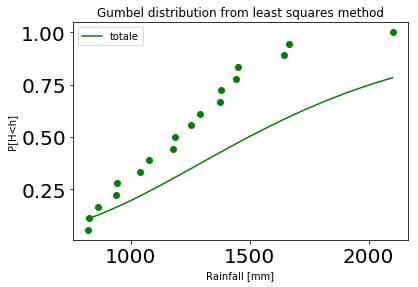

In [180]:
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
ax = gb.plot(color = ['green'])
datatot = data['totale'].dropna()
ecdf = ECDF(datatot)
ax.plot(datatot, ecdf(datatot), 'o', c = 'green', label = 'totale')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H<h]')
ax.set_title('Gumbel distribution from least squares method')
plt.show()